# Data Preparation 

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
dfx = pd.read_csv("Datasets/Locally Weighted Regression/weightedX.csv")
dfy = pd.read_csv("Datasets/Locally Weighted Regression/weightedY.csv")

In [40]:
x = dfx.values
y = dfy.values
print(x.shape)
print(y.shape)

(99, 1)
(99, 1)


In [41]:
plt.style.use("seaborn")

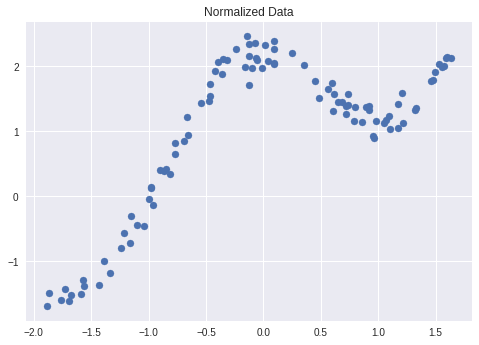

In [42]:
X = (x-x.mean())/x.std()
Y = y
plt.title("Normalized Data")
plt.scatter(X,Y)
plt.show()

# Computing Weight Matrix

In [43]:
def getW(query_point,X,tau):
    
    M = X.shape[0]
    W = np.mat(np.eye(M))
    
    for i in range(M):
        xi = X[i]
        x = query_point
        W[i,i] = np.exp(np.dot((xi-x),(xi-x).T)/(-2*tau*tau))
    return W

In [44]:
X = np.mat(X)
Y = np.mat(Y)
M = X.shape[0]
W = getW(-1,X,0.5)
print(W.shape)
print(W)

(99, 99)
[[4.37461134e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.35741601e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.34593282e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.29054046e-01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  5.78787793e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 5.21221566e-05]]


# Make Predictions

In [53]:
def predict(X,Y,query_point,tau):
    
    ones = np.ones((M,1))
    X_ = np.hstack((X,ones))
    
    qx = np.mat([query_point,1])
    W = getW(qx,X_,tau)

    theta = np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
    pred = np.dot(qx,theta)
#     print(theta.shape)
#     print(X_.shape)
#     print(X_[:5,:])
    return theta,pred

In [54]:

theta,predicted_value = predict(X,Y,1,1)
print(theta)
print(predicted_value)

[[0.14069504]
 [1.45348191]]
[[1.59417694]]


# Visualize Predictions and Analyse the effect of TAU  

In [55]:
def plotPrediction(tau):
    X_test = np.linspace(-2,2,20)
    Y_test = []
    
    for xq in X_test:
        theta,pred = predict(X,Y,xq,tau)
        Y_test.append(pred)
        
    Y_test = np.array(Y_test)
    
    XO = np.array(X)
    YO = np.array(Y)
    
    plt.scatter(XO,YO)
    plt.scatter(X_test,Y_test,c="red")
    plt.show()

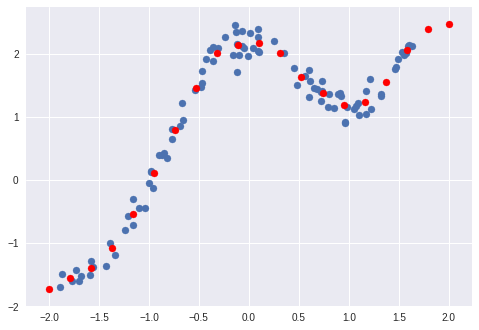

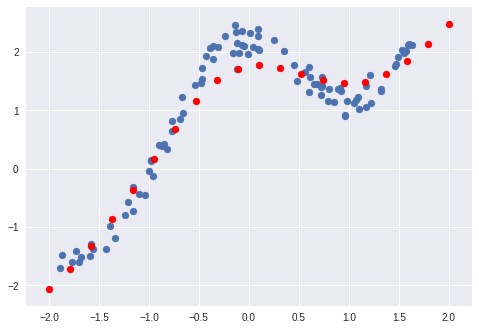

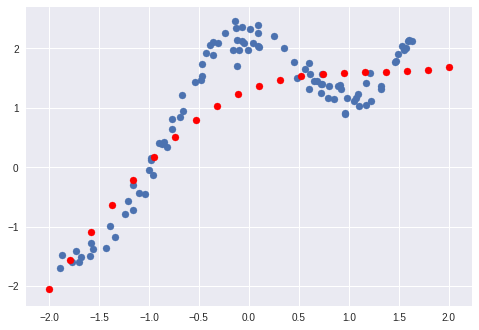

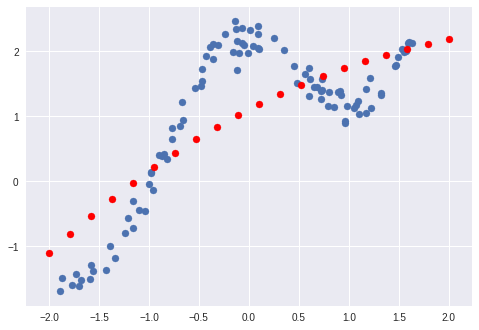

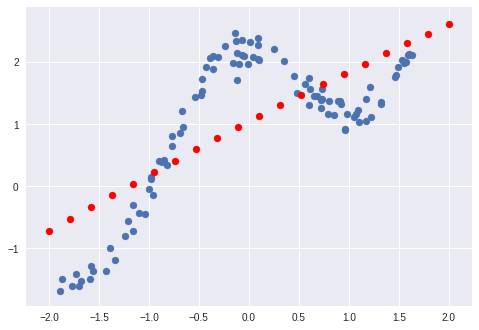

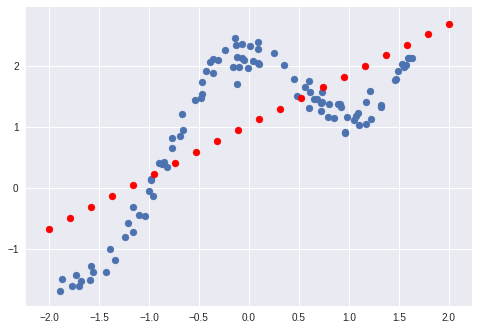

In [58]:
tau = [0.1,0.5,1,2,5,10]
for t in tau:
    plotPrediction(t)